In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
path=r"C:\Users\yzx\Desktop\ACT3321\hw"

os.chdir(path)
os.getcwd()

'C:\\Users\\yzx\\Desktop\\ACT3321\\hw'

<Figure size 640x480 with 0 Axes>

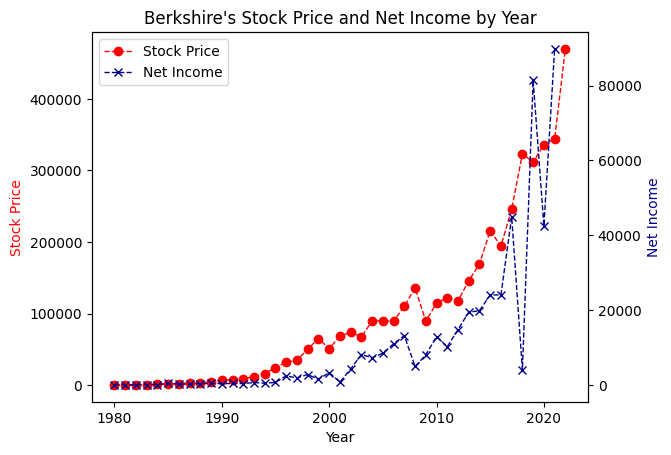

In [209]:
#################################################
### Q1.1 Plot Berkshire’s stock price and net income by year. ###
#################################################

# Load stock price data
stock_data=pd.read_csv('Berkshire_stock_price.csv')
# Convert 'date' column to datetime format
stock_data['date'] = pd.to_datetime(stock_data['date'], format='%d-%b-%y')
# Extract year and January stock price
stock_data['year'] = stock_data['date'].dt.year
jan_stock_price = stock_data[stock_data['date'].dt.month == 1]

# Load net income data
income_data=pd.read_csv('Berkshire_Fundamental.csv')

# Plot figures
plt.clf() #clear figures
fig, ax1 = plt.subplots()

# Plot stock price
line1, = ax1.plot(jan_stock_price['year'], jan_stock_price['PRC'], color="red", linestyle="dashed", linewidth=1, marker="o",label='Stock Price')
ax1.set_xlabel('Year')
ax1.set_ylabel('Stock Price', color="red")

# Plot net income
ax2 = ax1.twinx()
line2, = ax2.plot(income_data['year'], income_data['net_income'], color="darkblue", linestyle="dashed", linewidth=1, marker="x", label='Net Income')
ax2.set_ylabel('Net Income', color="darkblue")

# Merging legends
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')

plt.title("Berkshire's Stock Price and Net Income by Year")
plt.show()

Cost in January 1980: 3450.0
Value in January 2022: 4698050.0


<Figure size 640x480 with 0 Axes>

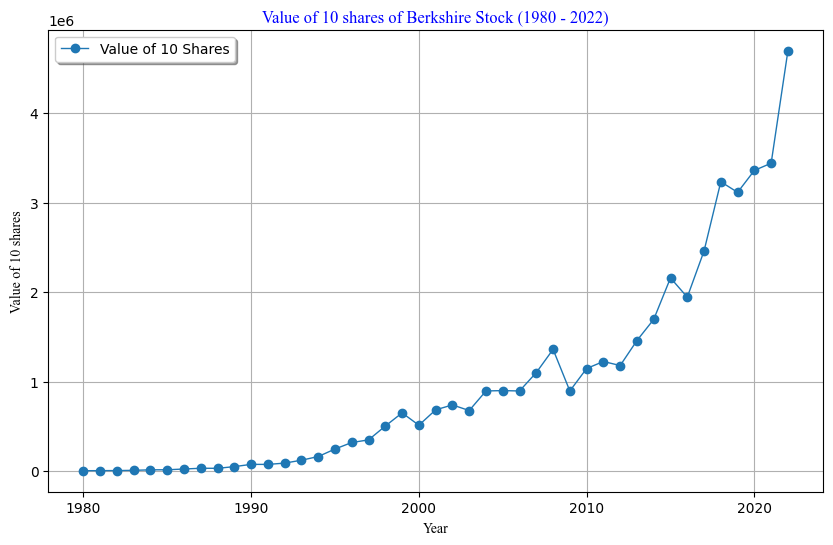

In [204]:
#################################################
### Q1.2 Calculate value of 10 shares in 1980 and 2022, and plot their values by year. ###
#################################################

# Calculate the cost of buying 10 shares in January 1980
jan_1980_stock_price = stock_data[(stock_data['date'].dt.year == 1980) & (stock_data['date'].dt.month == 1)]
price_per_share_1980 = jan_1980_stock_price.iloc[0]['PRC']
number_of_shares = 10
cost_in_1980 = price_per_share_1980 * number_of_shares
print("Cost in January 1980:", cost_in_1980)

# Calculate the value of 10 shares in January 2022
jan_2022_stock_price = stock_data[(stock_data['date'].dt.year == 2022) & (stock_data['date'].dt.month == 1)]
price_per_share_2022 = jan_2022_stock_price.iloc[0]['PRC']
value_in_2022 = price_per_share_2022 * number_of_shares
print("Value in January 2022:", value_in_2022)

# Plot the value of these 10 shares by year
# Calculate monthly value of these 10 shares from 1980-2022.
stock_data['value_10shares'] = stock_data['PRC'] * 10
# Extract these 10 stocks' value in January from 1980-2022.
jan_value_10shares = stock_data[stock_data['date'].dt.month == 1]

# Plot figure
plt.clf() #clear figures
plt.figure(figsize=(10, 6))

plt.plot(jan_stock_price['year'],jan_value_10shares['value_10shares'],linewidth=1,marker='o', linestyle='-')
plt.ylabel('Value of 10 shares', family='Times New Roman')
plt.xlabel('Year', family='Times New Roman')
plt.title('Value of 10 shares of Berkshire Stock (1980 - 2022)', family='Times New Roman', color="blue")
plt.legend(loc='upper left', shadow=True, labels=["Value of 10 Shares"])

plt.grid(True)
plt.show()

In [206]:
#################################################
### Q1.3 Plot volatility and annualized returns using scatter plot. ###
#################################################

# convert date-> year
stock_data['date'] = pd.to_datetime(stock_data['date'], format='%d-%b-%y')
stock_data['year'] = stock_data['date'].dt.year
stock_data['month']=stock_data['date'].dt.month

# compute monthly returns
stock_data['price']=stock_data['PRC']
stock_data['pre-month price']=stock_data.price.shift(1) 
stock_data['month_ret']=(stock_data['price']-stock_data['pre-month price'])/stock_data['pre-month price']

# compute annual return
annual_price=stock_data[stock_data['month']==1].reset_index(drop=True)
annual_price=annual_price[['year','price']]
annual_price['next_year_price']=annual_price.price.shift(-1) 
annual_price['annual_return']=(annual_price['next_year_price']-annual_price['price'])/annual_price['price']

#create an annual level data with avg price, volatility, num obervations
stock_sd=stock_data.groupby("year")["month_ret"].std().reset_index(name = "volatility")
stock_sd.head()
annual_price_volatility=annual_price.merge(stock_sd, left_on='year', right_on='year')
print(annual_price_volatility)

    year        price  next_year_price  annual_return  volatility
0   1980     345.0000         440.0000       0.275362    0.101858
1   1981     440.0000         517.5000       0.176136    0.067220
2   1982     517.5000         772.5000       0.492754    0.078370
3   1983     772.5000        1337.5000       0.731392    0.079043
4   1984    1337.5000        1410.0000       0.054206    0.022840
5   1985    1410.0000        2255.0000       0.599291    0.103408
6   1986    2255.0000        3100.0000       0.374723    0.096670
7   1987    3100.0000        3030.0000      -0.022581    0.096742
8   1988    3030.0000        4925.0000       0.625413    0.043012
9   1989    4925.0000        7455.0000       0.513706    0.083427
10  1990    7455.0000        7400.0000      -0.007378    0.065802
11  1991    7400.0000        8850.0000       0.195946    0.051562
12  1992    8850.0000       12100.0000       0.367232    0.048527
13  1993   12100.0000       16200.0000       0.338843    0.063382
14  1994  

In [207]:
#calculate the correlation between volatility and return
annual_price_volatility=annual_price_volatility[annual_price_volatility['year']<2022]
annual_price_volatility=annual_price_volatility[['year', 'annual_return', 'volatility']]
print("The correlation between volatility and return is:",annual_price_volatility['annual_return'].corr(annual_price_volatility['volatility']))

The correlation between volatility and return is: 0.24879720024408924


1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021


(array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35]),
 [Text(0, 0.1, '10%'),
  Text(0, 0.15000000000000002, '15%'),
  Text(0, 0.2, '20%'),
  Text(0, 0.25, '25%'),
  Text(0, 0.30000000000000004, '30%'),
  Text(0, 0.35, '35%')])

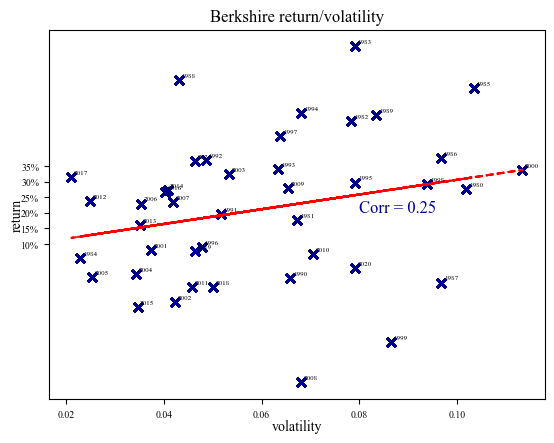

In [208]:
#plot volatility and annualized returns using scatter plot
x=annual_price_volatility['volatility']
y=annual_price_volatility['annual_return']

fig,ax = plt.subplots()
m, b = np.polyfit(x,y, 1)
ax.plot(annual_price_volatility['volatility'], m*annual_price_volatility['volatility']+b, color="red", linestyle="dashed")
ax.set_ylabel('return', family='Times New Roman')
ax.set_xlabel('volatility', family='Times New Roman')
ax.set_title('Berkshire return/volatility', family='Times New Roman')
vals = ax.get_yticks()
ax.set_yticks(vals)
ax.set_yticklabels(['{:.0%}'.format(x) for x in vals])
ax.yaxis.labelpad = -2
ax.xaxis.labelpad = 0

for i, txt in enumerate(annual_price_volatility.year):
    print(txt)
    #txt is the year in annual_price volatitilty.year
    #(x,y) are location of the dot
    #xytext are the location the text box
    ax.annotate(txt, (x[i], y[i]), xytext=(2,2), textcoords='offset points', fontsize=5, family='Times New Roman')
    plt.scatter(x, y, marker='x', color='darkblue')

ax.text(0.08, 0.2, 'Corr = 0.25', fontsize=12, family='Times New Roman', color="darkblue")

plt.xticks(fontsize=7, color='black', family='Times New Roman')
plt.yticks(fontsize=7, color='black', family='Times New Roman')